In [72]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv("WineQT.csv")

In [74]:


df.shape[0]

1143

In [75]:
std_finder = np.array(df["quality"])
z_score = (df["quality"]-df["quality"].mean())/std_finder.std()
outlier_list = []
for i in range(0,len(df)):
    if z_score[i]>2:
        outlier_list.append(i)

In [76]:
outlier_list

[190,
 197,
 271,
 310,
 321,
 340,
 349,
 352,
 419,
 747,
 769,
 793,
 850,
 996,
 1030,
 1104]

In [77]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [78]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [79]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

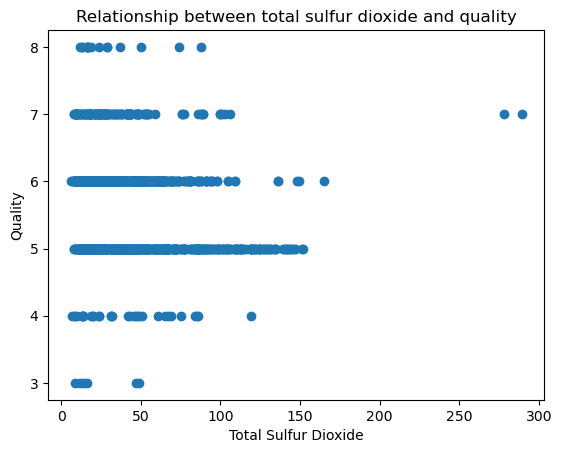

In [80]:
plt.scatter(x="total sulfur dioxide",y="quality",data=df)
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Quality")
plt.title("Relationship between total sulfur dioxide and quality")
plt.show()



In [81]:
# duplicated(ayni satira sahip verileri bulma)
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


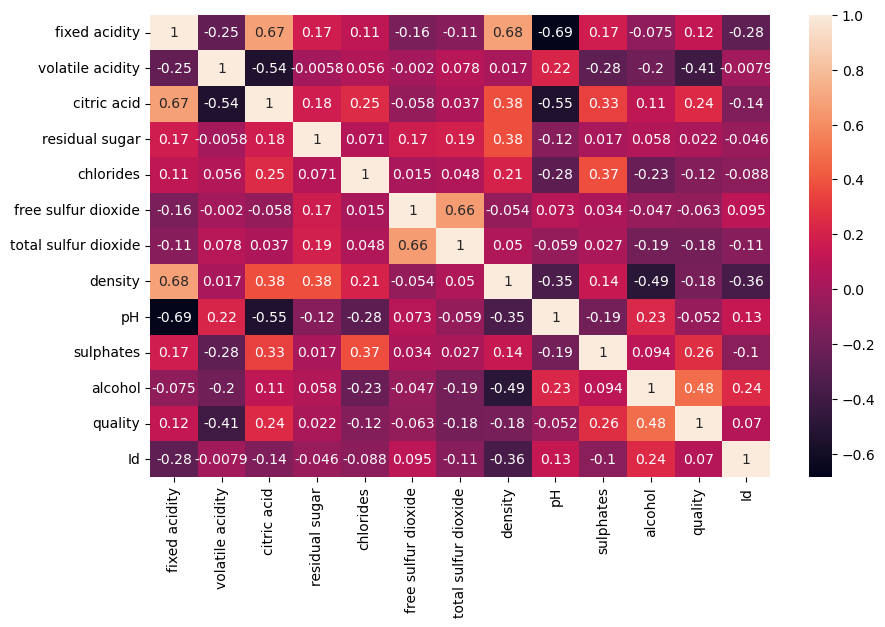

In [82]:
# satir ve sutunlardaki verilerin birbiri ile iliskileri
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [83]:
df.groupby("quality").median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,7.45,0.8175,0.050,2.1,0.0800,5.5,15.0,0.997565,3.355,0.56,9.825,1384.0
4,7.60,0.6750,0.070,2.1,0.0780,12.0,32.0,0.996640,3.380,0.56,10.000,703.0
5,7.80,0.5900,0.230,2.2,0.0810,14.0,46.0,0.996920,3.300,0.58,9.700,717.0
6,7.90,0.5000,0.245,2.2,0.0785,14.0,35.0,0.996520,3.320,0.64,10.500,894.5
7,8.70,0.3600,0.400,2.3,0.0730,12.0,28.0,0.995680,3.270,0.74,11.600,942.0
8,8.85,0.3550,0.455,2.1,0.0715,6.5,18.0,0.995580,3.225,0.73,11.750,543.0


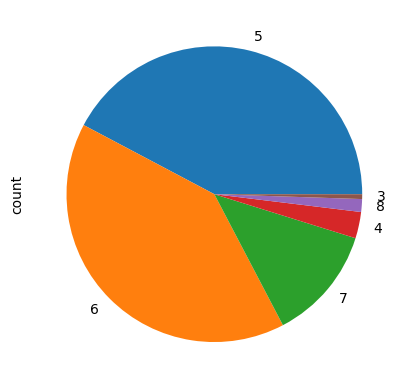

In [84]:
df.quality.value_counts().plot(kind="pie")
plt.show()

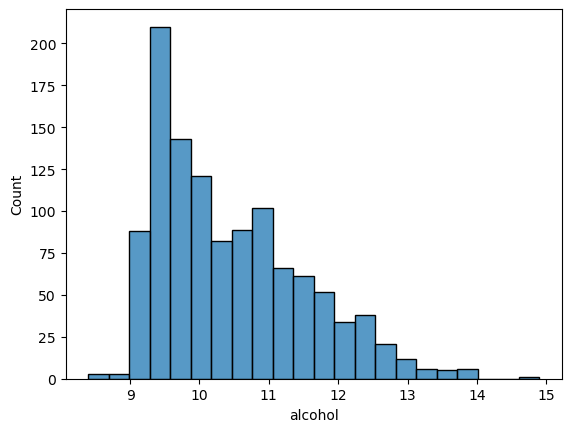

In [85]:
sns.histplot(df["alcohol"])
plt.show()

In [86]:
# tum ikili grafikleri cizer satir ve sutunlardaki verilerin birbiri ile olan iliskilerini gosterir.
# sns.pairplot(df)

plt.show()

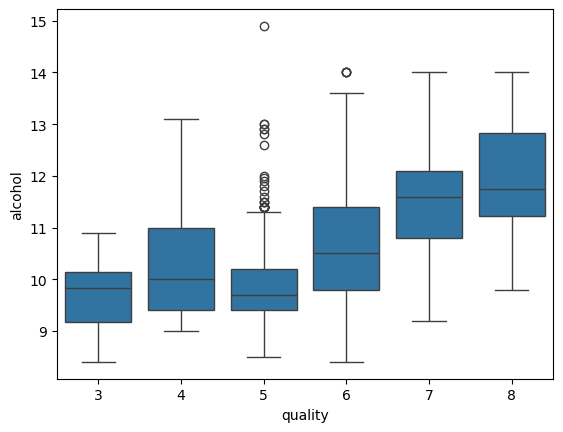

In [87]:
sns.boxplot(x="quality",y="alcohol",data=df)
plt.show()

In [88]:
df.groupby("quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,6,6,6,6,6,6,6,6,6,6,6,6
4,33,33,33,33,33,33,33,33,33,33,33,33
5,483,483,483,483,483,483,483,483,483,483,483,483
6,462,462,462,462,462,462,462,462,462,462,462,462
7,143,143,143,143,143,143,143,143,143,143,143,143
8,16,16,16,16,16,16,16,16,16,16,16,16


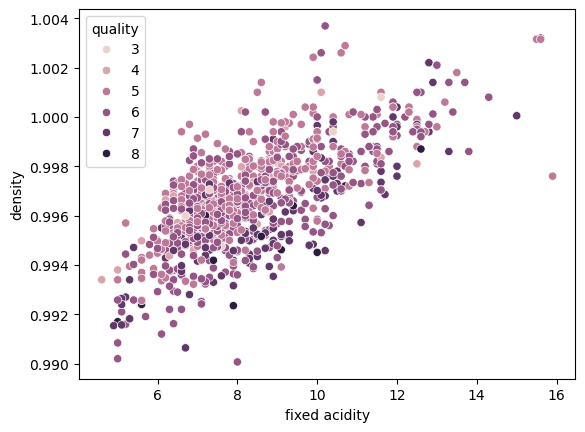

In [89]:
sns.scatterplot(x="fixed acidity",y="density",hue="quality",data = df)
plt.show()

C:\Users\furka\AppData\Local\Temp\ipykernel_14548\3559018573.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


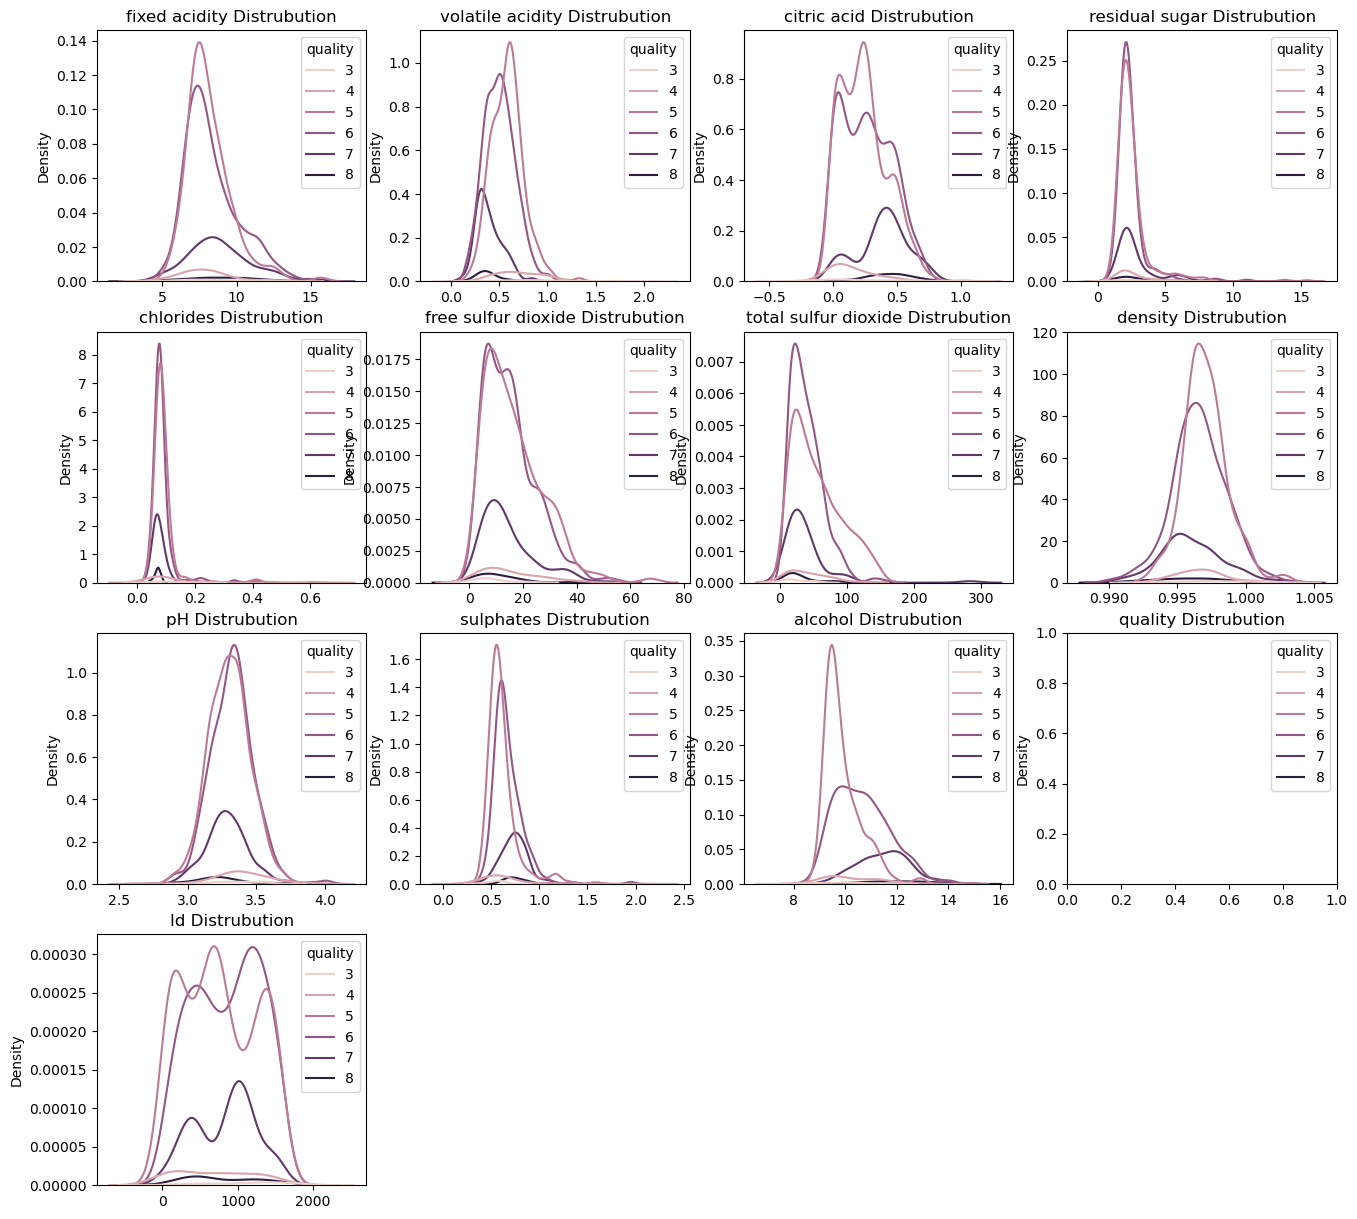

In [102]:
# Butun kolonlarin Dagilimini dizme
columns = df.columns
(fig,ax) = plt.subplots(4,4,figsize=(16,15))
ax=ax.flatten()
for i , column in enumerate(columns):
    sns.kdeplot(
        data=df,
        x=column,
        hue=df.quality,
        ax=ax[i]
    )
    ax[i].set_title(f"{column} Distrubution")
    ax[i].set_xlabel(None)

for i in range(i+1,len(ax)):
    ax[i].axis("off")

plt.show()